In [2]:
import pandas as pd
import numpy as np
#from mpl_finance import candlestick_ohlc

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [18]:
## add the PD source and columns 
df = pd.read_json('BN-main/ATOM_USDT-1d.json')
df.columns=['Date','Open','High','Low','Close','Volume']


#ada15['Open'].astype(float)



In [19]:
#start = pd.to_datetime('2020-01-01')
df['date']=df['Date']
df.Date=pd.to_datetime(df['Date'],unit='ms')

start = pd.to_datetime('2021-05-01')
end = pd.to_datetime('2021-05-20')
df = df.loc[(df['Date']> start)& (df['Date']< end)].copy()


df['Date'] = df['Date'].apply(mpl_dates.date2num)


for col in ['Open','High','Low','Close','Volume']:
    df[col].astype(float)
    

#df.Date(index)
#df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close,Volume,date
100,18749.0,23.798,23.936,22.155,23.088,2.276512e+06,1619913600000
101,18750.0,23.086,23.787,22.414,22.938,2.302562e+06,1620000000000
102,18751.0,22.967,23.400,20.809,20.963,3.649408e+06,1620086400000
103,18752.0,20.975,24.881,20.582,24.877,3.992868e+06,1620172800000
104,18753.0,24.876,27.119,24.091,25.542,6.880842e+06,1620259200000
105,18754.0,25.533,32.324,24.999,28.641,1.215312e+07,1620345600000
106,18755.0,28.651,31.452,26.871,29.524,6.832431e+06,1620432000000
107,18756.0,29.493,29.990,26.100,28.712,4.651059e+06,1620518400000
108,18757.0,28.712,29.900,23.600,25.357,5.304505e+06,1620604800000
109,18758.0,25.357,27.065,23.834,26.902,3.648488e+06,1620691200000


In [20]:
## support and resitance

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

In [21]:
df.idxmin()
df.first_valid_index() - df.shape[0]-2
start = df.first_valid_index()+2
end =  (df.first_valid_index()+df.shape[0])-2
start

102

In [22]:
## levels 
levels = []
for i in range(start,end):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))


In [23]:
#df = ada2021.loc[:,['Date','Open','High','Low','Close']]
df

,Date,Open,High,Low,Close,Volume,date
100,18749.0,23.798,23.936,22.155,23.088,2.276512e+06,1619913600000
101,18750.0,23.086,23.787,22.414,22.938,2.302562e+06,1620000000000
102,18751.0,22.967,23.400,20.809,20.963,3.649408e+06,1620086400000
103,18752.0,20.975,24.881,20.582,24.877,3.992868e+06,1620172800000
104,18753.0,24.876,27.119,24.091,25.542,6.880842e+06,1620259200000
105,18754.0,25.533,32.324,24.999,28.641,1.215312e+07,1620345600000
106,18755.0,28.651,31.452,26.871,29.524,6.832431e+06,1620432000000
107,18756.0,29.493,29.990,26.100,28.712,4.651059e+06,1620518400000
108,18757.0,28.712,29.900,23.600,25.357,5.304505e+06,1620604800000
109,18758.0,25.357,27.065,23.834,26.902,3.648488e+06,1620691200000


In [24]:
levels

[(103, 20.582), (105, 32.324), (111, 21.814), (113, 28.749)]

In [25]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.02, \
                   colorup='green', colordown='red', alpha=0.2)

  date_format = mpl_dates.DateFormatter('%s %m %h %d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='blue')
  fig.show()

/var/folders/t3/7kfp7_l943j4z41f1p54xwdm0000gn/T/ipykernel_8201/4129691824.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


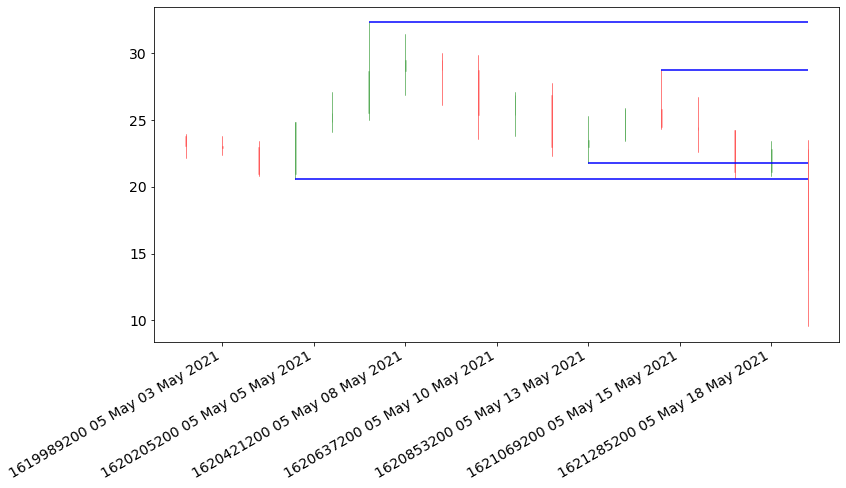

In [26]:
plot_all()